In [1]:
%matplotlib inline

from pathlib import Path
import pydicom as dicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import random_split
from typing import Any, Tuple
from skimage.transform import rescale, resize

In [154]:
# Deal with 224x224 images for this task
def img_loader(filename):    
    ds=dicom.dcmread(filename)
    ds=ds.pixel_array.astype(np.float32) / ds.pixel_array.max()
    ds = resize(ds, (224, 224)).astype(np.float32)    
    return ds


class PneumoniaDataset(torch.utils.data.Dataset):
    def __init__(self, img_path, img_labels_filepath, data_type, transform):
        super(PneumoniaDataset, self).__init__()
        img_labels = pd.read_csv(img_labels_filepath)
        self.img_path_list = [f"{img_folder}/{s}.dcm" for s in list(img_labels["patientId"][:100])]
        self.classes = [s for s in list(img_labels["Target"][:100])]
        self.transform = transform

    def __len__(self):
        return len(self.img_path_list)
    
    def __getitem__(self, index: int) -> Tuple[Any, Any]:
        """
        Args:
            index (int): Index

        Returns:
            tuple: (sample, target) where target is class_index of the target class.
        """
        path = self.img_path_list[index]
        sample = self.transform(path)
        target = self.classes[index]
        return sample, target

In [155]:
img_targets_file = "./data/stage_2_train_labels.csv"
img_folder=  "./data/stage_2_train_images"
img_labels = pd.read_csv(img_targets_file)

tr = transforms.Compose([transforms.ToTensor()])
data_folder = "data/stage_2_train_images"
labels_file = "data/stage_2_train_labels.csv"
data_type = 'train'
pn_dataset = PneumoniaDataset(data_folder, labels_file, data_type, img_loader)

train_data, test_data = random_split(pn_dataset, [0.7, 0.3])


train_loader = torch.utils.data.DataLoader(pn_dataset, batch_size=4, shuffle=True)
test_loader = torch.utils.data.DataLoader(pn_dataset, batch_size=4, shuffle=True)

In [156]:
x = img_loader(img_folder + '/00436515-870c-4b36-a041-de91049b9ab4.dcm')
x.shape

(224, 224)

In [50]:
dx=dicom.dcmread(img_folder + '/00436515-870c-4b36-a041-de91049b9ab4.dcm')
print(dx)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 200
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0002,0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002,0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002,0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008,0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.6379.1517874325.469569
(0008,0020) Study Date                          DA: '19010101'
(0008,0030) Study Time                    

In [157]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

def img_show(img):
    # npimg = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))
    plt.show()


images.shape

torch.Size([4, 224, 224])

In [165]:
# show images
data_iter = iter(train_loader)
images, labels = next(data_iter)
# print(" ".join(f"{labels}" for j in labels))

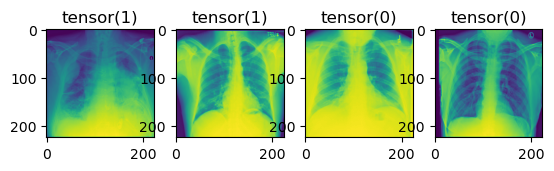

In [166]:
f, axarr = plt.subplots(1,4)
images, labels = next(data_iter)
for i, img in enumerate(images):
    axarr[i].imshow(img)
    axarr[i].set_title(labels[i])


In [119]:
print(labels[0])

tensor(1)


In [14]:
images.shape

torch.Size([4, 224, 224])

In [117]:
type(pn_dataset.classes[0])

int

In [8]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

dog1_int = read_image(str(Path('../assets') / 'dog1.jpg'))
dog2_int = read_image(str(Path('../assets') / 'dog2.jpg'))
dog_list = [dog1_int, dog2_int]

grid = make_grid(dog_list)
show(grid)

RuntimeError: [Errno 2] No such file or directory: '../assets/dog1.jpg'

In [ ]:
type(images[0])

In [ ]:
img_show(images)

In [139]:
classes

[0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0]

In [149]:
torch.Tensor([0]).shape

torch.Size([1])